In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import Callback

In [3]:
import matplotlib.pylab as plt

In [4]:
batch_size = 128
num_classes = 10
epochs = 10

img_x, img_y = 28,28

In [5]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

(60000, 28, 28)


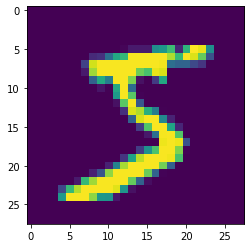

In [6]:
print(x_train.shape)
plt.imshow(x_train[0])

In [9]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [10]:
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

(60000, 28, 28, 1)
60000
10000


In [14]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [21]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), activation = 'relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))        
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
model = baseline_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [23]:
model_log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 32s 69ms/step - loss: 0.2091 - accuracy: 0.9379 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0445 - val_accuracy: 0.9848
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0328 - val_accuracy: 0.9904
Epoch 4/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0310 - val_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0222 - val_accuracy: